## Task: Scrape the entire website

To scrape the website, we use bs4 and go two leavels deep in the link tree from a page in the middle of the website

In [54]:
from bs4 import BeautifulSoup
import urllib.request
def get_links(link):
    lnks = []
    parser = 'html.parser'  # or 'lxml' (preferred) or 'html5lib', if installed
    resp = urllib.request.urlopen(str(link))
    soup = BeautifulSoup(resp, parser, from_encoding=resp.info().get_param('charset'))
    for link in soup.find_all('a', href=True):
        lnks.append(link['href'])
        str(lnks)
    return lnks
lnks = get_links("http://natgeotraveller.in/india/north-india/himachal-pradesh/")

In [55]:
import re
def clean_links(links):
    lnks = []
    for link in links:
        lnk = re.search("(?P<url>https?://[^\s]+)", link,flags=0)
        if lnk is not None:
            lnk.group(0)
            lnks.append(lnk[0])
    return lnks
def extract_natgeo(links):
    ng_links = []
    for link in links:
        if "natgeotraveller.in/" in link:
            ng_links.append(link)
    return ng_links

In [56]:
links = clean_links(lnks)

In [57]:
links = extract_natgeo(links)

In [61]:
final_links = []
tmp_links = []
for link in links:
    tmp_links = get_links(link)
    tmp_links = clean_links(tmp_links)
    tmp_links = extract_natgeo(tmp_links)
    tmp_links = list(dict.fromkeys(tmp_links))
    final_links.extend(tmp_links)
    print(len(final_links))

466
566
693
843
989
1135
1282
1429
1575
1721
1871
2022
2170
2317
2469
2620
2761
2906
3052
3131
3200
3344
3497
3596
3753
3900
4049
4052
4518
4618
4745
4895
5041
5187
5334
5481
5627
5773
5923
6074
6222
6369
6521
6672
6813
6958
7104
7183
7252
7396
7549
7648
7805
7952
8101
8104
8206
8357
8503
8652
8754
8856
8958
9060
9211
9357
9506
9608
9710
9812
9912
10063
10216
10368
10468
10568
10668
10767
10908
11059
11158
11257
11356
11456
11607
11753
11853
11953
12053
12148
12299
12449
12544
12639
12734
12835
12986
13139
13240
13391
13492
13593
13691
13842
13999
14097
14248
14346
14444
14545
14696
14849
14950
15051
15152
15253
15404
15550
15651
15752
15853
15952
16103
16249
16348
16447
16546
16696
16842
16988
17135
17281
17431
17582
17730
17877
18029
18133
18237
18348
18446
18548
18650
18747
18847
18926
18997
19063
19132
19201
19271


In [66]:
links = final_links

In [67]:
final_links = []
tmp_links = []
for link in links:
    tmp_links = get_links(link)
    tmp_links = clean_links(tmp_links)
    tmp_links = extract_natgeo(tmp_links)
    tmp_links = list(dict.fromkeys(tmp_links))
    final_links.extend(tmp_links)
    print(len(final_links))

228
284
354
411
470
527
585
641
694
752
808
862
922
979
1036
1084
1135
1187
1241
1290
1329
1380
1438
1501
1562
1616
1673
1676
1732
1785
1838
1880
1935
1988
2032
2076
2124
2174
2228
2275
2333
2391
2443
2487
2533
2586
2636
2687
2744
2789
2830
2896
2949
3001
3057
3119
3170
3224
3275
3330
3391
3454
3508
3580
3613
3671
3722
3775
3831
3887
3942
3989
4047
4101
4150
4203
4255
4301
4354
4413
4463
4520
4572
4626
4681
4732
4791
4846
4895
4951
5001
5052
5107
5166
5220
5272
5324
5375
5430
5486
5542
5593
5643
5694
5748
5806
5860
5912
5981
6035
6084
6140
6198
6248
6302
6355
6406
6460
6511
6565
6621
6674
6725
6780
6835
6886
6939
7006
7060
7118
7169
7222
7272
7318
7370
7428
7480
7532
7579
7632
7684
7736
7786
7837
7890
7939
7987
8036
8088
8141
8194
8246
8294
8353
8409
8468
8518
8566
8616
8666
8723
8774
8819
8868
8919
8978
9029
9085
9138
9185
9232
9277
9328
9373
9418
9465
9511
9561
9611
9657
9709
9760
9808
9858
9909
9969
10019
10075
10130
10176
10226
10275
10325
10374
10429
10491
10542
10594
10639
10688


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


30745


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


30745
30798
30844
30885
30926
30996


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


30996


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


30996
31037
31083
31140
31179
31218
31258
31308
31358
31399
31438
31479
31521
31566
31615
31656
31695
31746
31788
31827
31866
31916
31955
32004
32047
32086
32125
32166
32205
32246
32285
32338
32379
32427
32483
32524
32564
32620
32671
32724
32768
32810
32858
32897
32953
33002
33042
33096
33136
33176
33230
33275
33322
33378
33431
33488
33533
33572


In [69]:
final_links = list(dict.fromkeys(final_links))

In [70]:
len(final_links)

3122

In [71]:
final_links

['http://natgeotraveller.in/',
 'http://natgeotraveller.in/india/',
 'http://natgeotraveller.in/international/',
 'http://natgeotraveller.in/trip-ideas/adventure/',
 'http://natgeotraveller.in/trip-ideas/cities/',
 'http://natgeotraveller.in/trip-ideas/culture/',
 'http://natgeotraveller.in/getaways/epic-journeys/',
 'http://natgeotraveller.in/trip-ideas/family-time/',
 'http://natgeotraveller.in/trip-ideas/food-drink/',
 'http://natgeotraveller.in/getaways/hotels/',
 'http://natgeotraveller.in/trip-ideas/mountains/',
 'http://natgeotraveller.in/trip-ideas/ocean/',
 'http://natgeotraveller.in/trip-ideas/road-trips/',
 'http://natgeotraveller.in/trip-ideas/spirituality/',
 'http://natgeotraveller.in/trip-ideas/wildlife/',
 'http://natgeotraveller.in/where-to-go-in-2020/',
 'http://natgeotraveller.in/travel-talk/columns/',
 'http://natgeotraveller.in/travel-talk/from-the-experts/',
 'http://natgeotraveller.in/travel-talk/news/',
 'http://natgeotraveller.in/community/meet-the-team/',
 'ht

In [123]:
my_links = []
for link in final_links:
    if ("sponsored" in link) or ("promotion" in link) or ("video" in link) or ("photos" in link) or ("dailyshot" in link) or ("/whatson/" in link) or ("/web-exclusive/" in link) or ("/author/" in link) or ("/travel-talk/" in link) or ("partner-content" in link) or ("/trip-ideas/" in link) or ("coronavirus" in link) or ("/india/" in link) or ("/international/" in link)or ("/sponsor/" in link) or("tag/" in link) or ("media.natgeotraveller.in" in link):
        pass
    else:
        my_links.append(link)

In [124]:
len(my_links)

1011

In [125]:
my_links.sort(key=len)

In [128]:
my_links = my_links[60:]

In [129]:
my_links

['http://natgeotraveller.in/on-a-roman-holiday-trail/',
 'http://www.natgeotraveller.in/?p=15401&preview=true',
 'http://www.natgeotraveller.in/?p=11567&preview=true',
 'http://natgeotraveller.in/chasing-lucy-in-ethiopia/',
 'http://natgeotraveller.in/new-yorks-new-neighbours/',
 'http://natgeotraveller.in/my-adopted-animal-family/',
 'http://natgeotraveller.in/dubais-fabulous-flavours/',
 'http://natgeotraveller.in/the-science-of-singapore/',
 'http://natgeotraveller.in/how-to-summer-in-finland/',
 'http://natgeotraveller.in/exploring-japan-by-train/',
 'http://natgeotraveller.in/getting-saucy-about-food/',
 'http://natgeotraveller.in/ncpa-in-your-living-room/',
 'http://natgeotraveller.in/bhutans-kingdom-of-bliss/',
 'http://natgeotraveller.in/capital-views-in-beijing/',
 'http://natgeotraveller.in/the-old-and-new-of-prague/',
 'http://natgeotraveller.in/in-the-mood-for-hong-kong/',
 'http://natgeotraveller.in/21-journeys-of-a-lifetime/',
 'http://natgeotraveller.in/catching-up-in-qu

In [130]:
len(my_links)

901

In [190]:
def get_text(link):
    text = []
    parser = 'html.parser'  # or 'lxml' (preferred) or 'html5lib', if installed
    resp = urllib.request.urlopen(str(link))
    soup = BeautifulSoup(resp, parser, from_encoding=resp.info().get_param('charset'))
    for line in soup.find_all('p'):
        text.append(line)
        str(text)
    return text

In [195]:
text = get_text("http://natgeotraveller.in/exploring-japan-by-train/")
text[0].text
article = ''
for element in text:
    article+= element.text
article = article.replace(u'\xa0', u' ')
article = article.replace(u'\r', u' ')

In [196]:
article

'Nostalgia and practicality, tradition and technology, concepts that seem like paradoxes merge together to create one of the most pragmatic transport systems in the world, right from travel time to the quality of your journey. When you take a train in Japan, from eating up regional bento boxes (ekiben) on local lines to reclining with a glass of wine on the Shinkansen (bullet train), you are participating in the Idris Elba of cultural institutions—all other countries want to be you, for very good reasons.One of the most convenient and best deals available for tourists is the Japan Railways East Pass. This option gives travellers five flexible train travel days over a period of two weeks, valid on local, limited, and limited express trains all across the stunning northeastern region of Japan, known as Tohoku. The area is comprised of six prefectures, where travellers can find powder snow ready to be carved up by skiers in the winter, and breathtaking festivals that merge communal celebr

## Create Vocabulary

In [208]:
len(my_links)

901

In [209]:
documents = []
my_links = my_links[:850]
for link in my_links:
    text = get_text(str(link))
    article = ''
    for element in text:
        article+= element.text
    article = article.replace(u'\xa0', u' ')
    article = article.replace(u'\r', u' ')
    documents.append(article)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


900 something articles and I have 850. Should be good enough to build a vocabulary

In [210]:
len(documents)

850

In [211]:
import nltk
import sklearn

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

## TF-IDF Vectorizer

The **TF-IDF** scheme tries to deal with common words by analyzing how common they are in the corpus and how common they are in the document to create a combined score.

$\mathrm{tf}(t,d) = 0.5 + 0.5 \cdot  \frac{f_{t, d}}{\max\{f_{t', d}:t' \in d\}}$

$\mathrm{idf}(t, D) =  \log \frac{N}{|\{d \in D: t \in d\}|}$

$\mathrm{tfidf}(t,d,D) = \mathrm{tf}(t,d) \cdot \mathrm{idf}(t, D)$

In [244]:
vect = TfidfVectorizer()
word_m = vect.fit_transform(documents).todense()
vocab = vect.vocabulary_
len(vocab)

53951

## Take articles by LS and Compare their cosine similarity to other articles

In [214]:
ls_articles = [
    "http://www.natgeotraveller.in/a-culture-ride-through-chiang-mai-and-chiang-rai/",
    "http://www.natgeotraveller.in/splendour-at-sea/",
    "http://www.natgeotraveller.in/in-thailand-nostalgia-on-wheels/",
    "http://www.natgeotraveller.in/a-citys-state-of-mind/",
    "http://www.natgeotraveller.in/the-great-outdoors-may-not-be-great-for-long/",
    "http://www.natgeotraveller.in/searching-for-our-pop-culture-gods/",
    "http://www.natgeotraveller.in/a-bombay-classic-that-endures/",
    "http://www.natgeotraveller.in/redefining-goals/",
    "http://www.natgeotraveller.in/why-our-forests-need-watching/",
    "http://www.natgeotraveller.in/a-soulmate-for-summer/",
    "http://www.natgeotraveller.in/how-deep-is-your-travel-love/",
    "http://www.natgeotraveller.in/travel-inspiration-for-2019-a-book-on-nietzsche-and-hiking/",
    "http://www.natgeotraveller.in/what-dreams-may-come/",
    "http://www.natgeotraveller.in/free-on-the-outside/",
    "http://www.natgeotraveller.in/in-the-mood-for-winter/",
    "http://www.natgeotraveller.in/slow-days-fast-company/",
    "http://www.natgeotraveller.in/six-years-and-counting/",
    "http://www.natgeotraveller.in/getting-saucy-about-food/",
    "http://www.natgeotraveller.in/there-is-more-to-france-than-paris/",
    "http://www.natgeotraveller.in/eye-on-the-tiger-in-madhya-pradesh/",
    "http://www.natgeotraveller.in/champagne-frances-bottoms-up-approach/",
    "http://www.natgeotraveller.in/life-in-a-paris-metro/",
    "http://www.natgeotraveller.in/mountain-getaway-setting-up-a-hammock-in-the-himalayas-at-shey-bhumi-leh/",
    "http://www.natgeotraveller.in/kalki-koechlins-art-of-travel-go-with-the-flow/",
    "http://www.natgeotraveller.in/airbnbs-country-manager-amanpreet-bajaj-on-making-the-world-home/",
    "http://www.natgeotraveller.in/taste-trumps-travel/"
]

In [217]:
def Diff(list1, list2): 
    return (list(list(set(list1)-set(list2)) + list(set(list2)-set(list1))))

In [218]:
other_links = Diff(my_links,ls_articles)

In [219]:
len(other_links)

876

In [220]:
len(ls_articles)

26

In [221]:
ls_articles_text = []
for link in ls_articles:
    text = get_text(str(link))
    article = ''
    for element in text:
        article+= element.text
    article = article.replace(u'\xa0', u' ')
    article = article.replace(u'\r', u' ')
    ls_articles_text.append(article)

In [223]:
other_text = []
for link in other_links:
    text = get_text(str(link))
    article = ''
    for element in text:
        article+= element.text
    article = article.replace(u'\xa0', u' ')
    article = article.replace(u'\r', u' ')
    other_text.append(article)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [246]:
word_m1 = vect.transform(ls_articles_text)
word_m1.shape

(26, 53951)

In [247]:
word_m2 = vect.transform(other_text)
word_m2.shape

(876, 53951)

In [254]:
from sklearn.metrics.pairwise import cosine_similarity
sim_mat = cosine_similarity(word_m1, word_m2)
sim_mat_100 = cosine_similarity(word_m1, word_m2[:100])

In [250]:
import numpy as np
import matplotlib.pyplot as plt

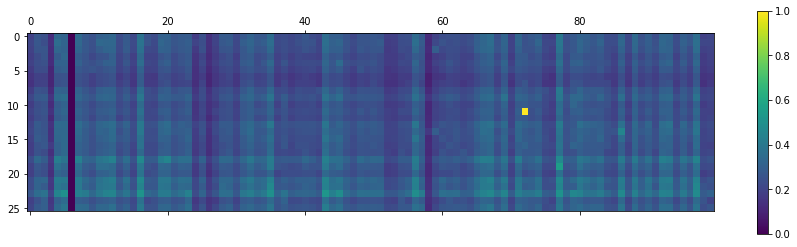

In [255]:
plt.matshow(sim_mat_100);
plt.colorbar()
plt.show()

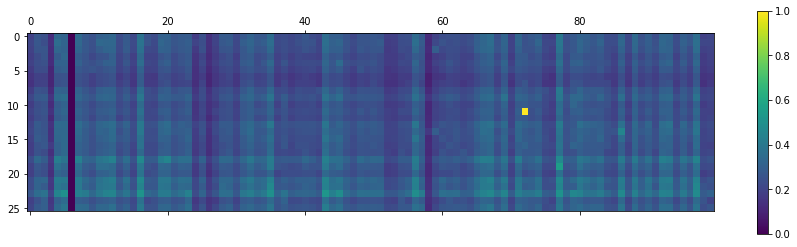

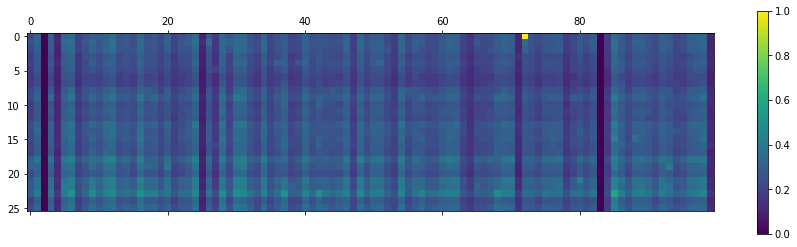

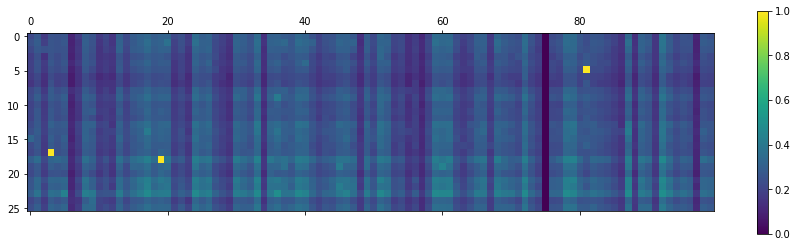

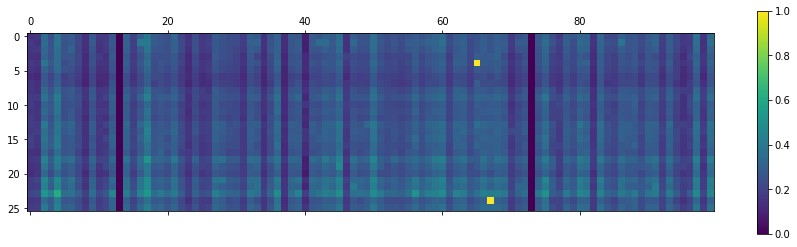

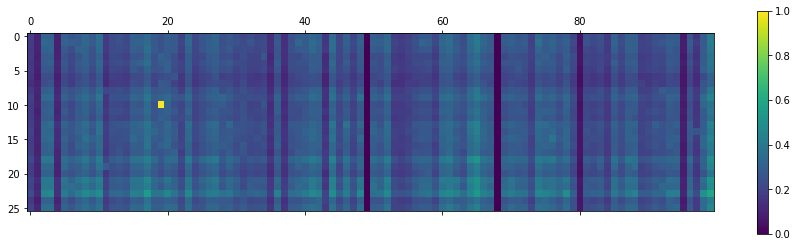

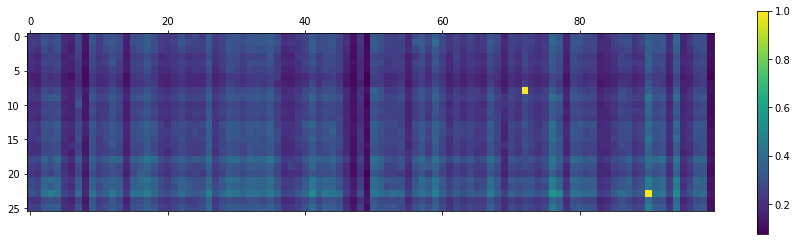

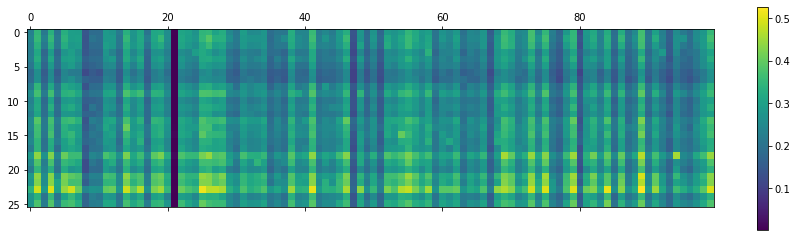

In [257]:
for i in range(100,800,100):
    sim_mat_n = cosine_similarity(word_m1, word_m2[i-100:i])
    plt.matshow(sim_mat_n);
    plt.colorbar()
    plt.show()

## Conclusion

Cosine similarity indicates that her work is in fact, original. Our recommendation is to hire her.